# Plot data given on ORCA grid

In [2]:
import os
import re
import glob
import sys

import numpy  as np
import pandas as pd 
import xarray as xr
import xesmf as xe
import dask as dsk

import matplotlib.pyplot as plt
from   matplotlib.collections import LineCollection
from   matplotlib.colors      import ListedColormap, BoundaryNorm
import cmocean.cm as cmo
from   scipy.interpolate import griddata

from   cartopy import config
import cartopy.crs as ccrs

proj = ccrs.PlateCarree()

# Read data
Data can be downloaded fro surfarchive:
- sftp sterl@archive.surfsara.nl
- cd /nfs/archive09/climate/dutch-climate-scenarios/ec-earth-3/cmorised-results/dutch-climate-scenarios/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/*\<variant_id\>*/Omon/thetao/gn/v20210701/, where *\<variant_id\>* $\in$ [r10i1p5f1, r11i1p5f1, r12i1p5f1, r13i1p5f1, r14i1p5f1, r15i1p5f1, r16i1p5f1, r1i1p5f1, r2i1p5f1, r3i1p5f1, r4i1p5f1, r5i1p5f1, r6i1p5f1, r7i1p5f1, r8i1p5f1, r9i1p5f1]

In [3]:
var = 'thetao'
year = '2005'
run = 'r1i1p5f1'

#nobac_kiki = '/nobackup/users/ommeren'

colmap = {'thetao':   plt.cm.coolwarm}

levels = {'thetao':   np.arange(-2,30,2)}

f =  xr.open_mfdataset(f"/nobackup/users/sterl/EC-Earth3_p5/{run}/thetao_Omon_EC-Earth3_historical_{run}_gn_*.nc")

fld = f[var]

# Plot one layer on native grid
with geographical grid added

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times'

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times'

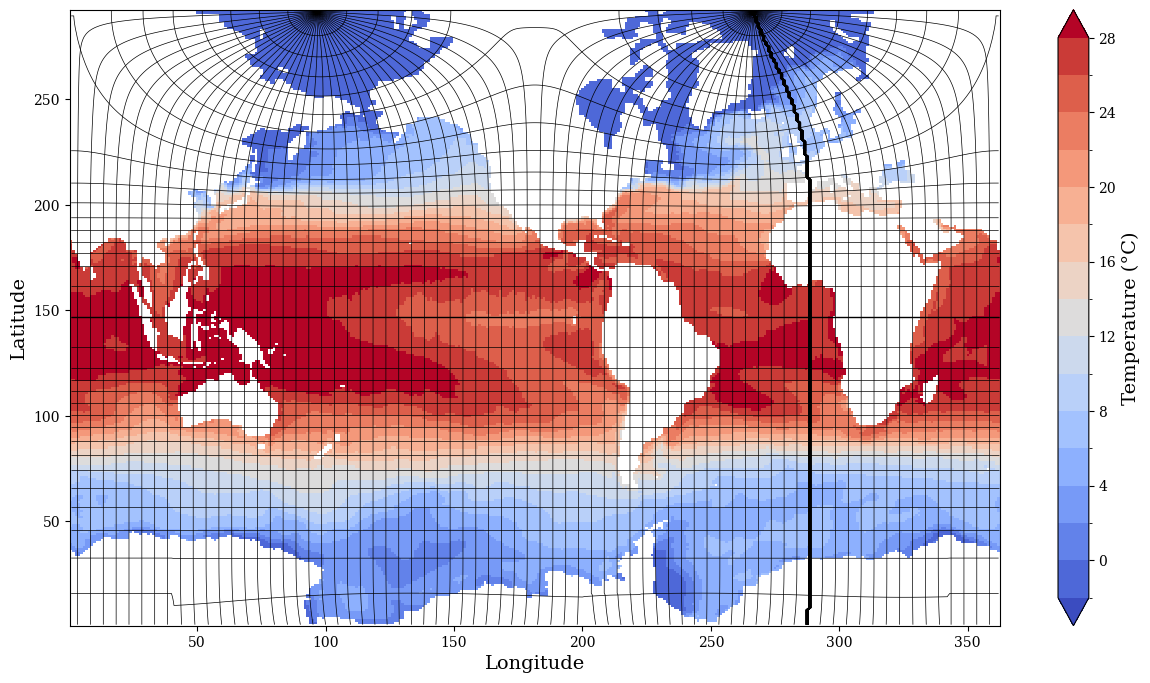

In [5]:
plt.rcParams['font.family'] = ['Times New Roman', 'Times', 'serif']
plot = fld.isel(lev=3).isel(time=0).plot(levels=levels[var], extend='both', cmap=colmap[var], figsize=(15,8), cbar_kwargs={'label': 'Temperature °C'})

plot.colorbar.ax.set_ylabel('Temperature (°C)', fontsize=14)
f.latitude.plot.contour(colors='black', linestyles='-', linewidths=0.5, levels=np.arange(-90,90,5))
f.latitude.plot.contour(colors='black', linestyles='-', linewidths=1, levels=[0])
f.longitude.plot.contour(colors='black', linestyles='-', linewidths=0.5, levels=np.arange(0,380,5))

plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)

plt.savefig('grid.png', dpi=300, bbox_inches='tight')
plt.show
